### Problem Statement - 
    US-based housing company Surprise Housing has entered the Australian market. The company wants to uses data analytics on the data collected by the company from the sale of house in Australia. Using this the company wants to purchase houses  at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market. The requirement is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

From this modelling we need to know:

    1. Which variables are significant in predicting the price of a house, and
    2. How well those variables describe the price of a house.
    
### Business Goal for the company - 
    The above model will be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading the day.csv bike sharing data file
raw_data = pd.read_csv('train.csv')

# Checking the data dimension
print(raw_data.shape)

# Let's have a view of the data
raw_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preparation

In [3]:
# Checking for the NA values and datatype
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Converting MSSubClass which is actually a categorical variable represented in numerical codings is converted to categorical
raw_data['MSSubClass'] = raw_data['MSSubClass'].astype(str)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To get a glimpse of the data properties of numerical columns
pd.set_option('display.max_columns', 40)
raw_data.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Dropping the columns which has more than 75% as null values

In [6]:
# Getting the names of columns which has large missing values(Greater than 75%)
mlist = raw_data.columns[(raw_data.isnull().sum()/len(raw_data)) > 0.75]

mlist

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [7]:
# Dropping the columns in mlist
raw_data.drop(mlist, axis = 'columns', inplace = True)

# Also dropping the unique identifier 'Id' from the dataframe and FireplaceQu which has nearly 50% missing value which cannot be imputed
raw_data.drop(['Id','FireplaceQu'], axis = 'columns', inplace = True)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Imputing the missing values in categorical variables

In [9]:
# Getting the list of categorical variables and its length
catList = raw_data[raw_data.select_dtypes(include=['object']).columns.tolist()].count()
catList

MSSubClass       1460
MSZoning         1460
Street           1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinType2     1422
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
KitchenQual      1460
Functional       1460
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
PavedDrive       1460
SaleType         1460
SaleCondition    1460
dtype: int64

### The list of categorical variables which needs imputation based on the above information
"MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Electrical","GarageType","GarageFinish","GarageQual","GarageCond"

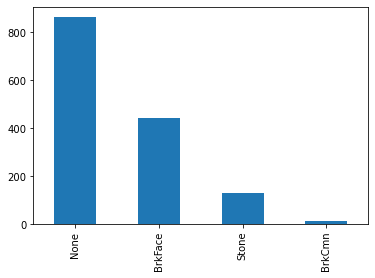

In [10]:
# Visualising the data for MasVnrType column for data imputation
raw_data["MasVnrType"].value_counts().plot.bar()
plt.show()

In [11]:
# Repacing NA values with the mode from the above graph i.e, None
raw_data["MasVnrType"].fillna(value="None", inplace=True)

# Confirming that NA value is correctly replaced
raw_data["MasVnrType"].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

###  "BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1",  "BsmtFinType2" are not considered for missing values as the NA in the column indicates non availability of basement and not the missing value. Will Replace the NA in these columns as NotA(Not Available), so that we can use NA related functions like fillna() and others.

In [12]:
# Repacing NA values with a meaningful short form for not avaliable as NotA
raw_data["BsmtQual"].fillna(value="NotA", inplace=True)
raw_data["BsmtCond"].fillna(value="NotA", inplace=True)
raw_data["BsmtExposure"].fillna(value="NotA", inplace=True)
raw_data["BsmtFinType1"].fillna(value="NotA", inplace=True)
raw_data["BsmtFinType2"].fillna(value="NotA", inplace=True)

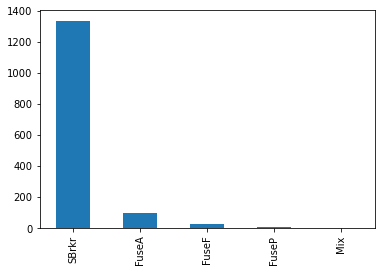

In [13]:
# Visualising the data for MasVnrType column for data imputation
raw_data["Electrical"].value_counts().plot.bar()
plt.show()

In [14]:
# Repacing NA values with the mode from the above graph i.e, None
raw_data["Electrical"].fillna(value="SBrkr", inplace=True)

# Confirming that NA value is correctly replaced
raw_data["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Similar to basement related variables, garage related variables; "GarageType", "GarageFinish", "GarageQual", "GarageCond" are also not considered for data imputation as NA indicates Garage not available

In [15]:
# Repacing NA values with a meaningful short form for not avaliable as NotA
raw_data["GarageType"].fillna(value="NotA", inplace=True)
raw_data["GarageFinish"].fillna(value="NotA", inplace=True)
raw_data["GarageQual"].fillna(value="NotA", inplace=True)
raw_data["GarageCond"].fillna(value="NotA", inplace=True)

### Considering numerical variables for data imputation

In [16]:
# Getting the list of numerical variables and its length
numList = raw_data[raw_data.select_dtypes(include=['int64', 'float64']).columns.tolist()].count()
numList

LotFrontage      1201
LotArea          1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
MasVnrArea       1452
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1379
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
MoSold           1460
YrSold           1460
SalePrice        1460
dtype: int64

### From the above list, the variables LotFrontage, MasVnrArea and GarageYrBlt needs imputation

C:\Users\raora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


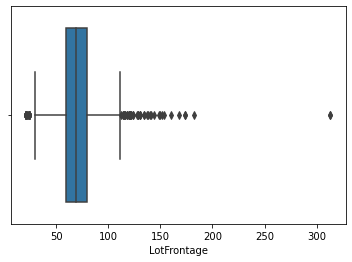

In [17]:
# Visualising the LotFrontage numerical data with a boxplot
sns.boxplot(raw_data.LotFrontage)
plt.show()

In [18]:
# Replacing the NA values in LotFrontage with the median value
raw_data.LotFrontage.fillna(raw_data.LotFrontage.median(),inplace=True)

In [19]:
# Checking the replacement for NA in LotFrontage column
raw_data.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

C:\Users\raora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


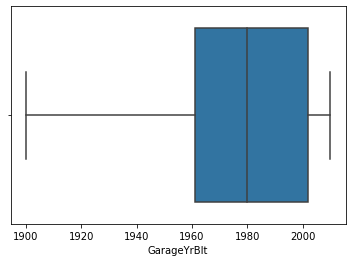

In [20]:
# Visualising the GarageYrBlt numerical data with a boxplot
sns.boxplot(raw_data.GarageYrBlt)
plt.show()

In [21]:
# As the mean value is highly influenced by the outliers and since there are no outliers in the FarageYrBlt data, replacing the missing values with the mean year
raw_data.GarageYrBlt.fillna(int(raw_data.GarageYrBlt.mean()),inplace=True)

# Checking the replacement for NA in LotFrontage column
raw_data.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1978., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

C:\Users\raora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


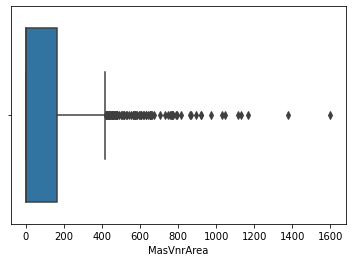

In [22]:
# Visualising the MasVnrArea numerical data with a boxplot
sns.boxplot(raw_data.MasVnrArea)
plt.show()

In [23]:
# Replacing the NA values in MasVnrArea with the median value as there are outliers in the data
raw_data.MasVnrArea.fillna(raw_data.MasVnrArea.median(),inplace=True)

In [24]:
# Checking for the remaining NA values in the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### All the NA data has been filled with appropriate values and confirmed from the above.

## Exploratory Data Analysis

In [25]:
# Lets find the age of the building from the given data and remove the ones like month of selling. There are cases in which the buildings are remodelled and that is considered for the building age
raw_data['BuildingAge'] = raw_data['YrSold'] - raw_data['YearRemodAdd']

raw_data.drop(['YrSold', 'YearBuilt','YearRemodAdd', 'MoSold'], inplace = True, axis = 1) 

raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,BuildingAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,...,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,...,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,...,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8


### Plotting the box plot and distribution plots on numerical variables to draw inferences

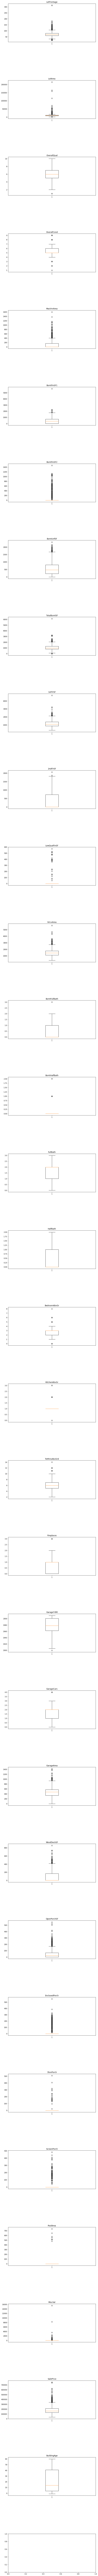

In [26]:
# Getting the updated numerical variables list
numList = raw_data[raw_data.select_dtypes(include=['int64', 'float64']).columns.tolist()].count()

# Have to plot 34 plots for 34 numerical variables
fig, ax = plt.subplots(nrows=34, ncols = 1)
fig.set_size_inches(10, 300, forward=True)
plt.subplots_adjust(hspace=1)

# To keep plot count
pc = 0

# Using looping to construct the plots
for lis in numList.index :
    numData = raw_data[lis]
    ax[pc].boxplot(numData)
    ax[pc].set_title(lis)
    pc += 1


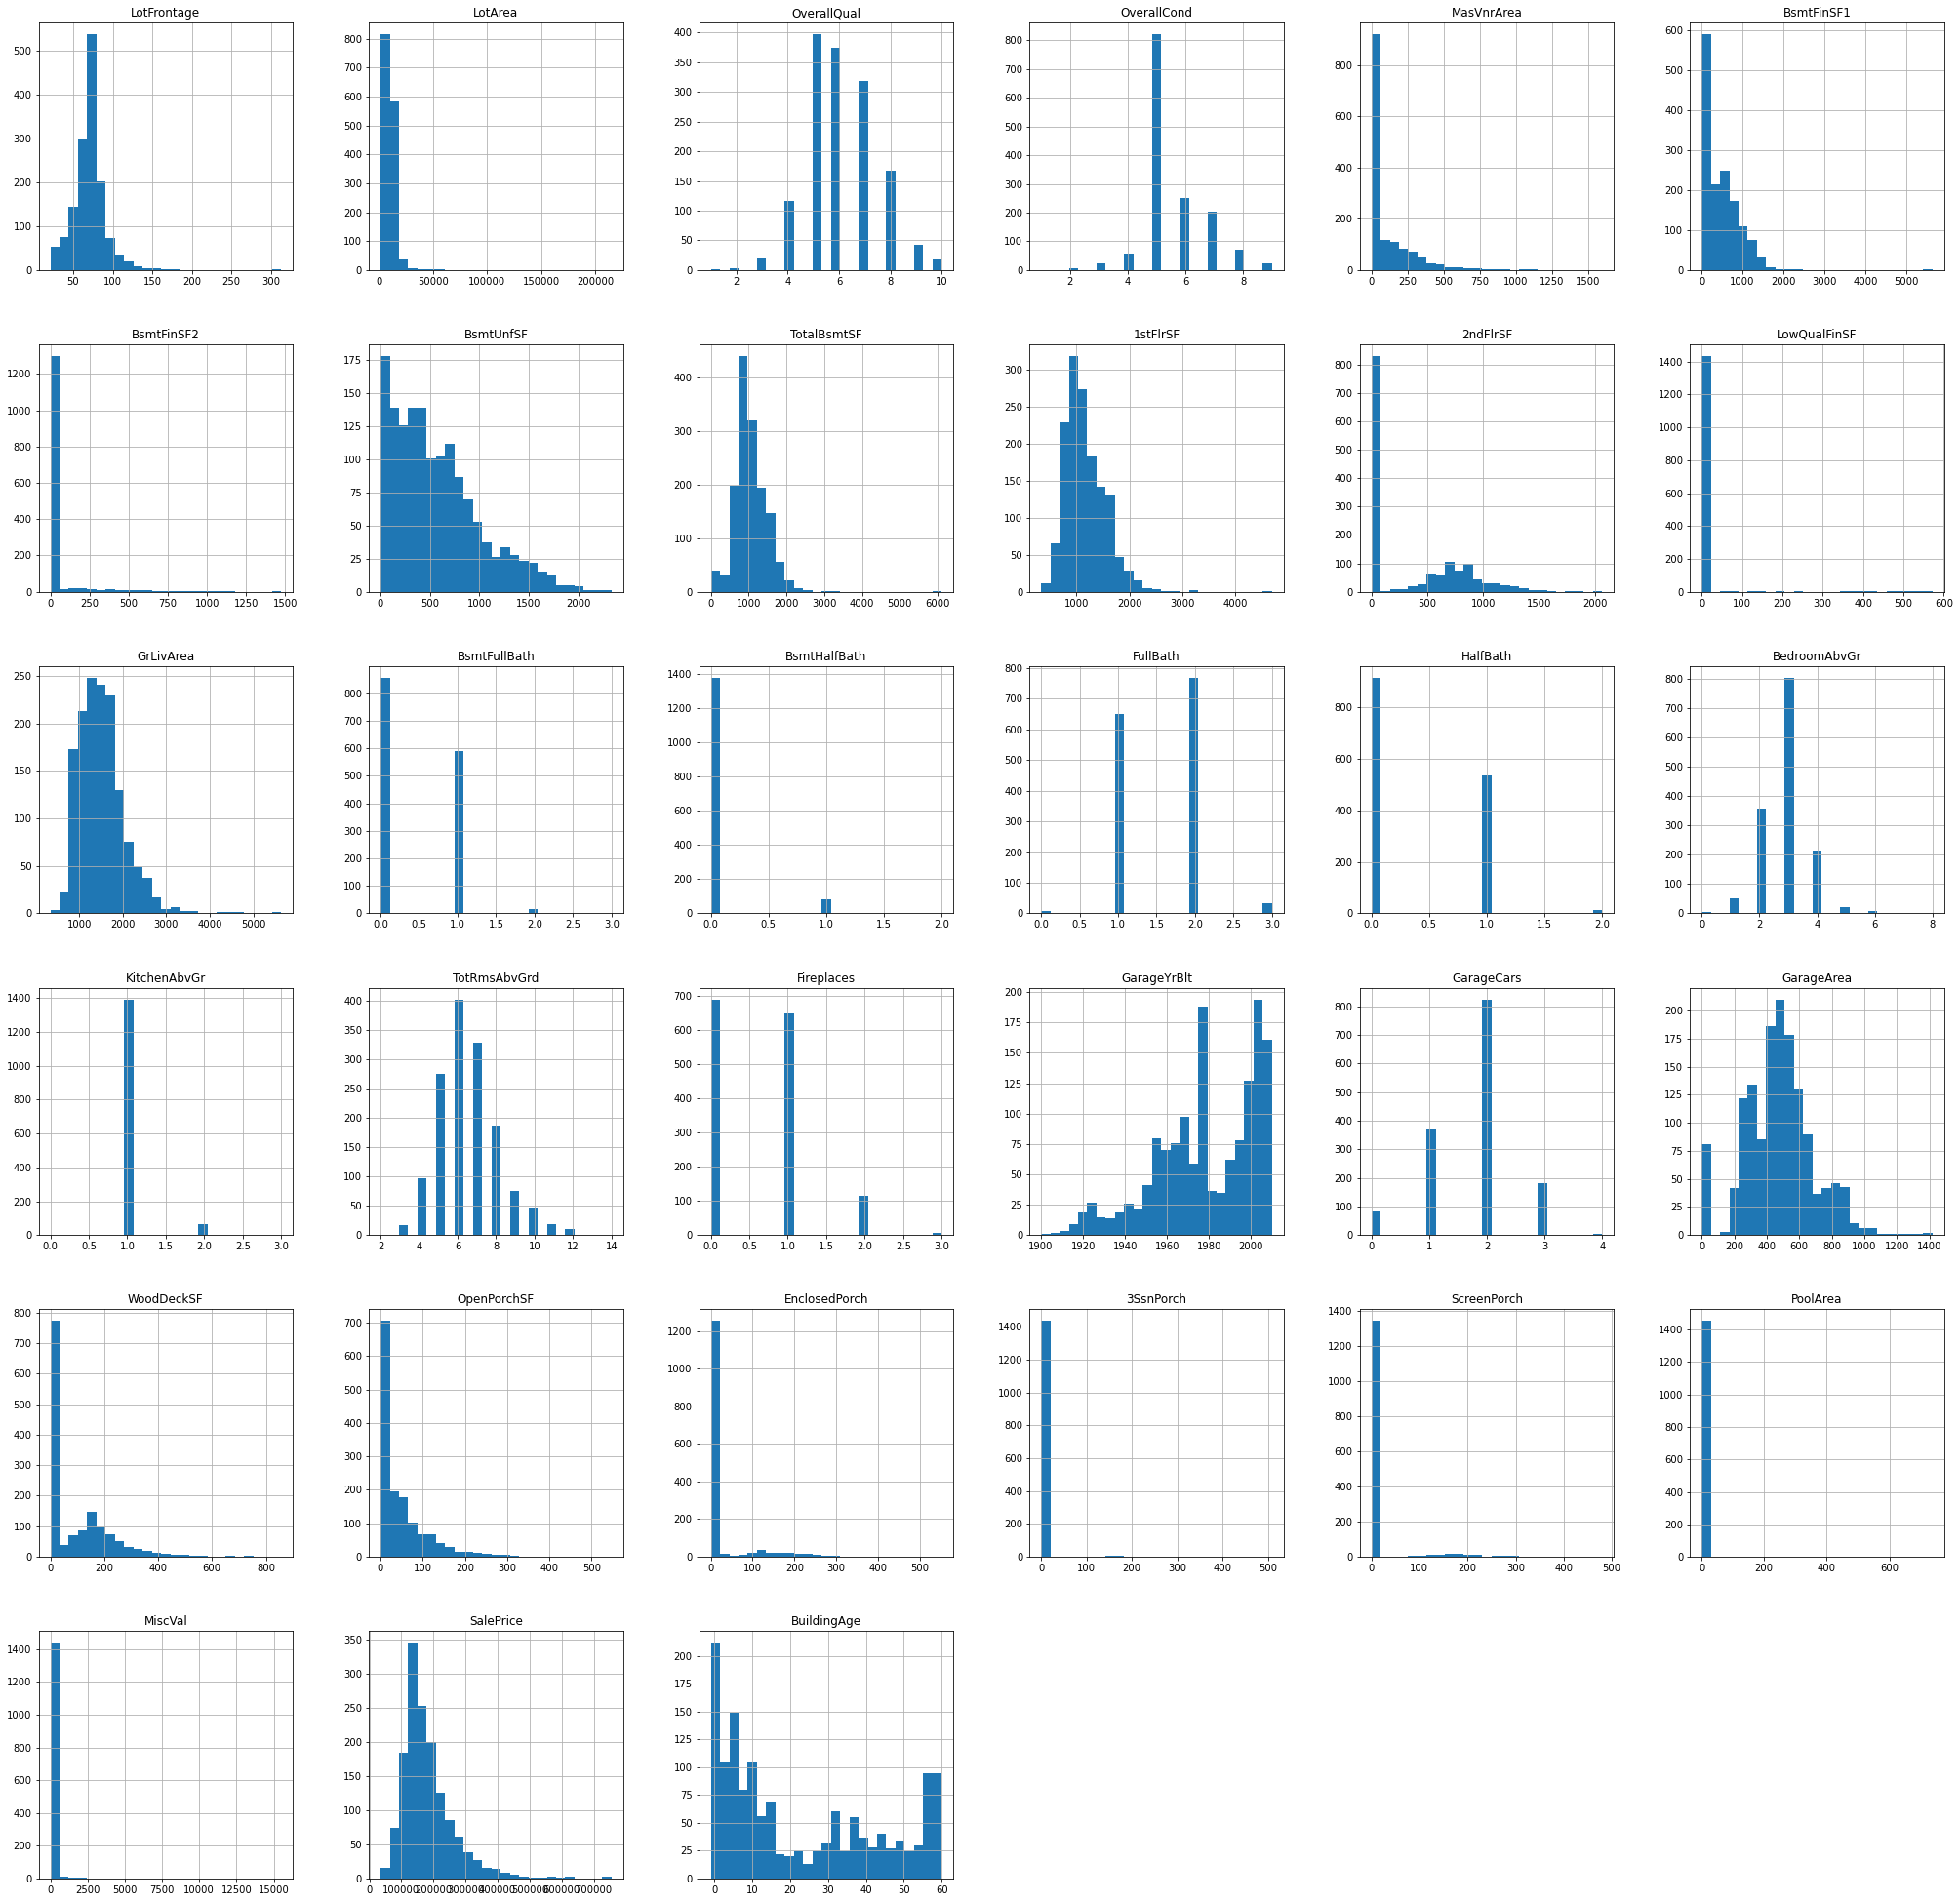

In [27]:
raw_data[numList.index].hist(bins=25, figsize=(35, 35))
plt.show()

### Inferences from Univariate analysis of numerical variables
1. Much of the buildings sold are in the range of 5 to 40 with most of it between 15 to 40 years. 25% of the houses for sale are between 0-5 yrs of building age.
2. There is gradual dip in the number of houses for sale from 0 yrs to 25 yrs and then increases onwards.
3. IQR for the SalePrice is in the range of approx 150K and is little right skewed.
4. There are around 80 houses with no garage and roughly has an average of 450 sq.ft.
5. Houses are of minimum 2 rooms to upto 14 rooms. Maximum houses has 6 rooms.
6. Houses having number of bedrooms above ground is more at 3 bedrooms.
7. Houses with 0 pools dominate and only one could be seen with pool area of around 500 sq.ft.
8. More houses have 1 kitchen above ground and only few has 2 kitchens.
9. Houses are sold after finishing the construction as house which went for sale with some unfinished square feet is very less.
10. 1, 1.5 and 2 story and more or less of new styling is more on sale.
11. Basement with no bathrooms are more, but still there are houses with single bathroom in basement.
12. Houses with 500 to 4000 sq.ft are for sale with mean seemingly around 1500 sq.ft.
13. Houses with Average house condition and above are more on sale. Houses which are below average gets less to see in sale.

### Checking for variable correlations

In [28]:
# Getting the correlation for the numerical variables
varCor = raw_data[numList.index].corr()

In [29]:
varCor

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.064833,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.334771,-0.082957
LotArea,0.304522,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024454,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,-0.014709
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.519278,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,-0.552570
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306118,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856,-0.070931
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.246754,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,-0.177105
BsmtFinSF1,0.214367,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150858,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,-0.127556
BsmtFinSF2,0.042463,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.086933,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.069814
BsmtUnfSF,0.124098,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.186255,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,-0.183830
TotalBsmtSF,0.363472,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.312470,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,-0.292096
1stFlrSF,0.413773,0.299475,0.476224,-0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.227872,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852,-0.241310


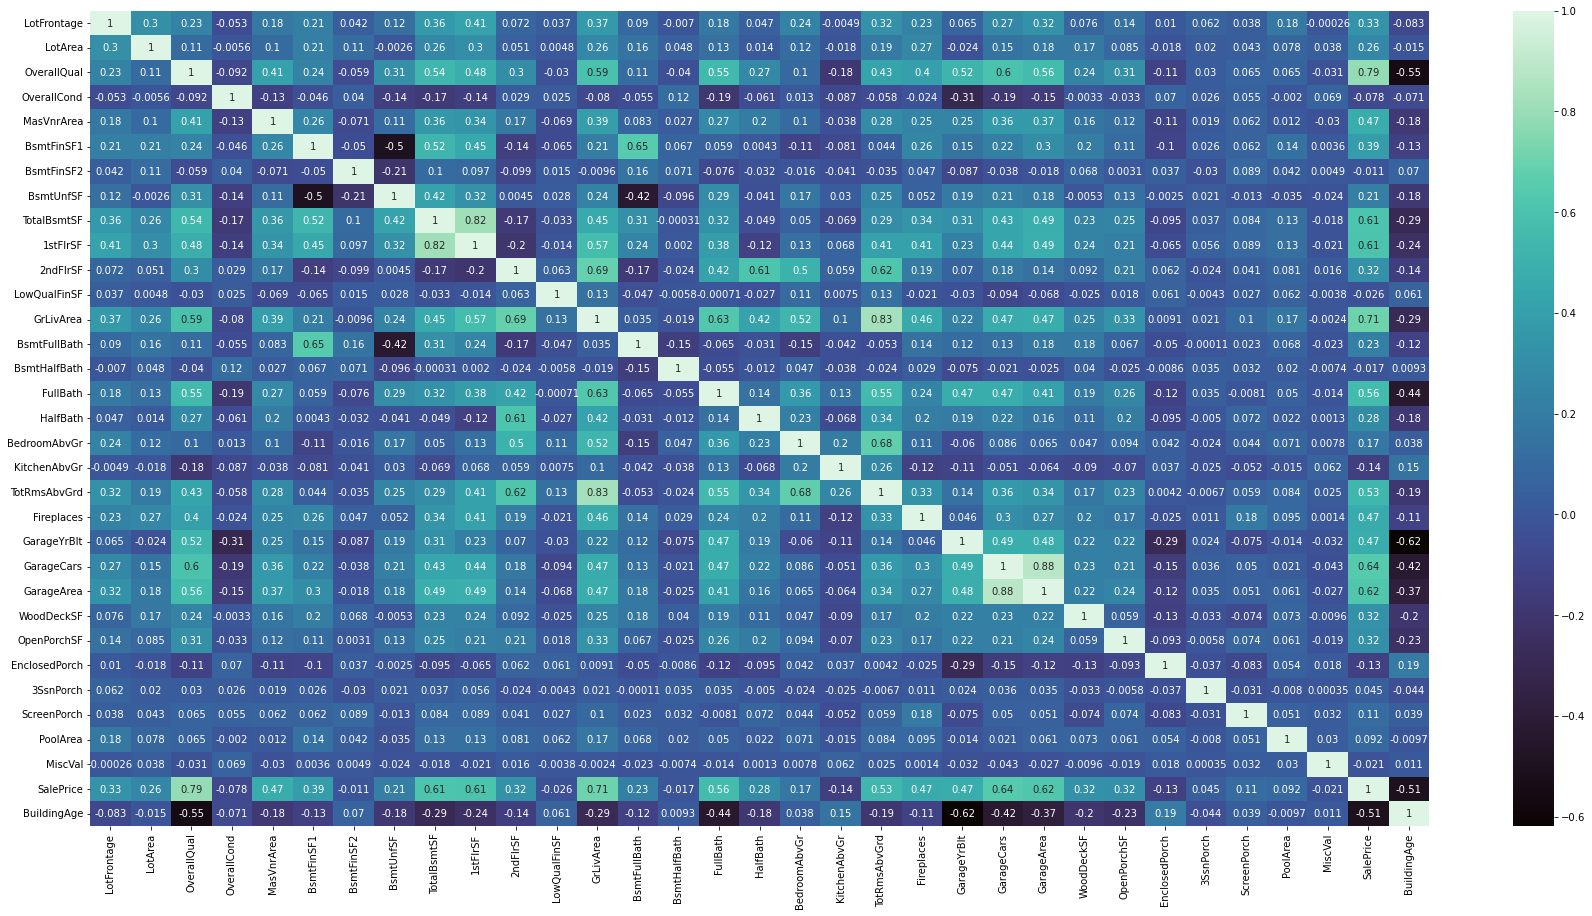

In [30]:
# Plotting the heatmap

plt.figure(figsize=(30,15))
sns.heatmap(varCor, cmap = "mako", annot = True)
plt.show()

### The following variables are highly correlation with the target variable SalePrice
1. With OverallQual:     0.79
2. TotalBsmtSF:          0.61
3. 1stFlrSF:             0.61
4. GrLivArea:            0.71
5. FullBath:             0.56
6. TotRmsAbvGrd:         0.53
7. GarageCars:           0.64
8. GarageArea:           0.62
9. BuildingAge:          -0.51(Negatively correlated)

### Bivariate Analysis of the numerical variables

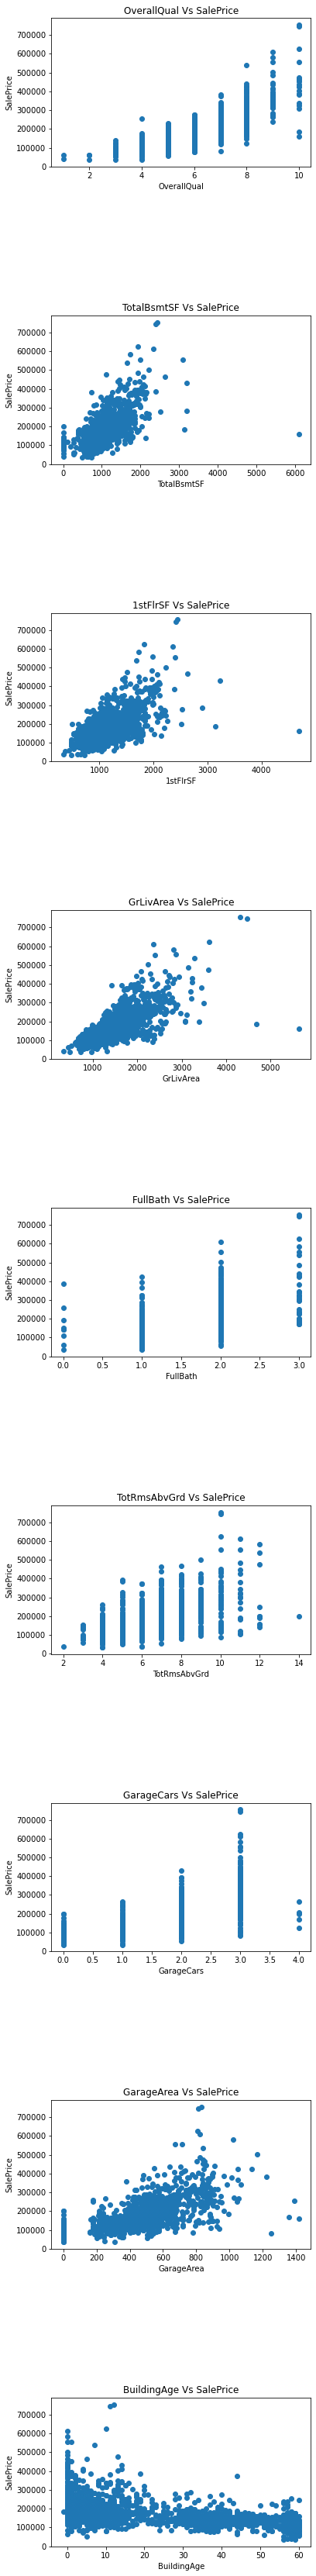

In [31]:
highCorList = ["OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "BuildingAge"]

# Have to plot 9 plots for the above highly correlated variables
fig, ax = plt.subplots(nrows=9, ncols = 1)
fig.set_size_inches(6, 60, forward=True)
plt.subplots_adjust(hspace=1)

# To keep plot count
pc = 0

# Using looping to construct the plots
for lis in highCorList :
    ax[pc].scatter(raw_data[lis], raw_data['SalePrice'] )
    ax[pc].set_title(lis + " Vs SalePrice")
    ax[pc].set_xlabel(lis)
    ax[pc].set_ylabel('SalePrice')
    pc += 1

### Inferences

1. All the variables except the BuildingAge shows linear increasing relationship. BuildingAge has a negative correlation with the SalePrice. Appears for now that we can handle this with MLR.

### Plotting the categorical variables to draw inferences

In [32]:
# Getting the updated list of categorical variables
catList = raw_data[raw_data.select_dtypes(include=['object']).columns.tolist()].count()

In [33]:
len(catList)

39

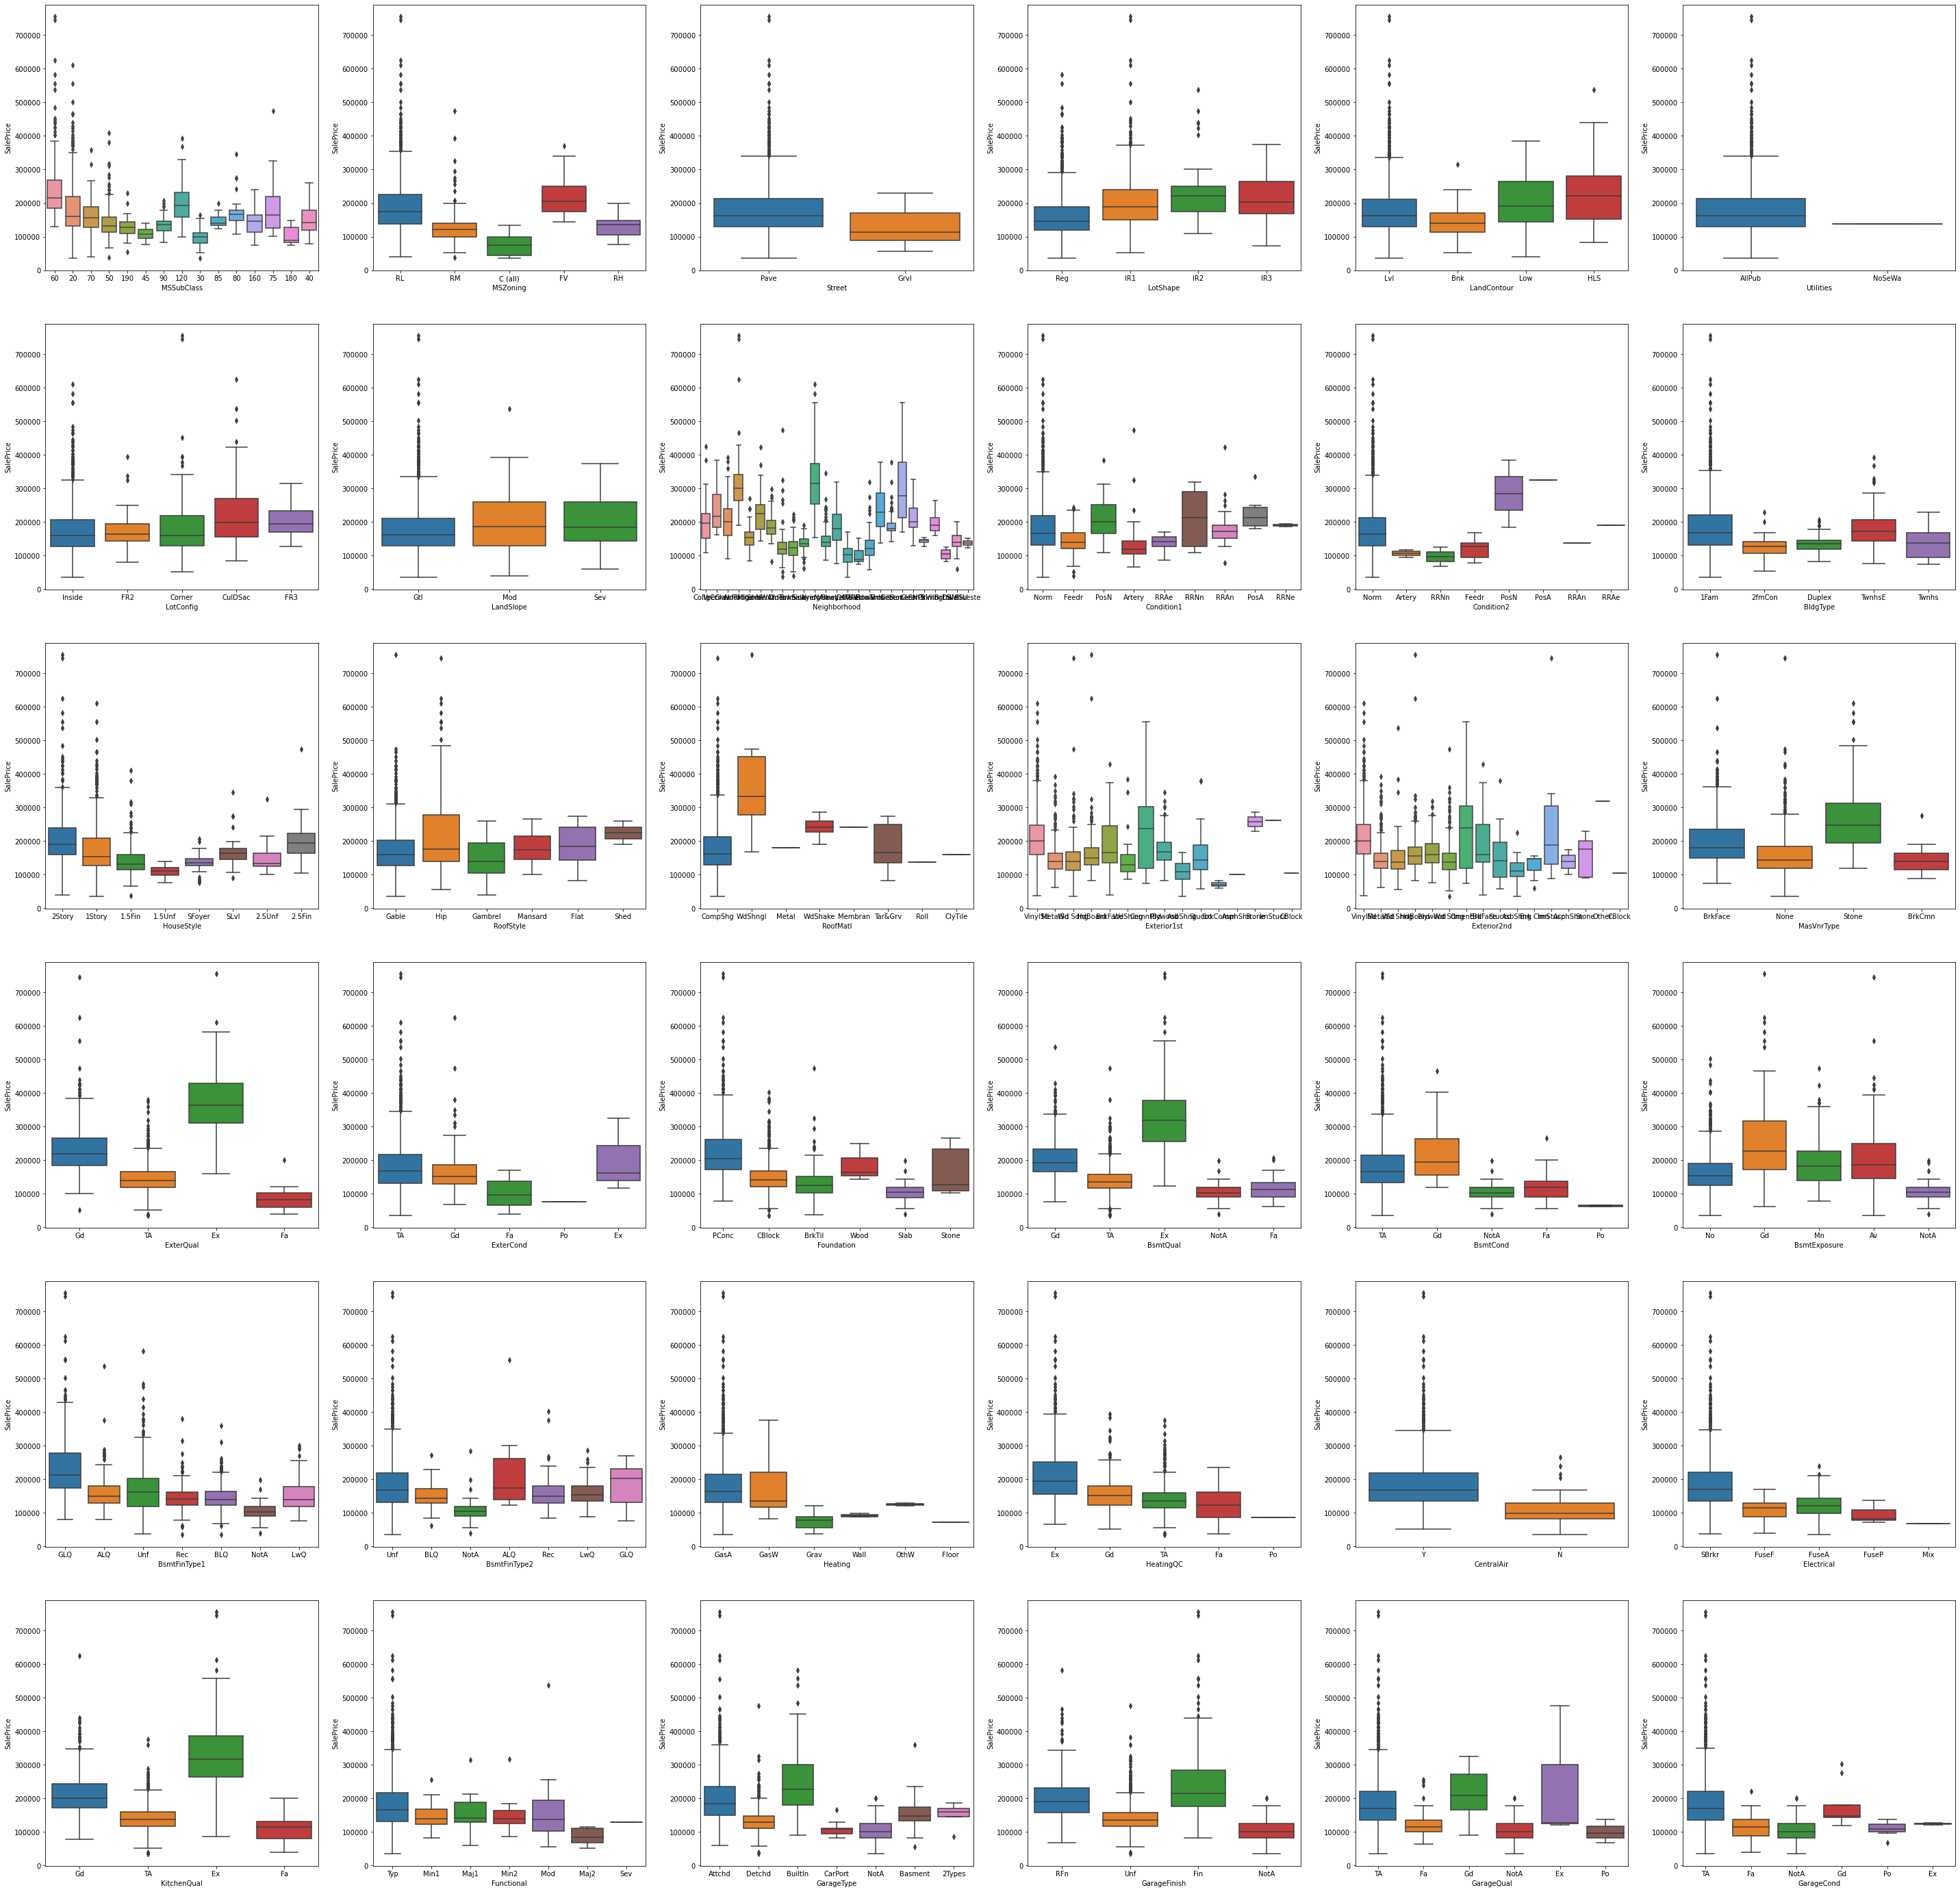

In [34]:
# Plotting the box plot for the first 36 variables against the saleprice which is the target variable
plt.figure(figsize = (50,50)) 
pc = 1

# Using looping to construct the plots
for lis in catList.index :
    plt.subplot(6, 6, pc)
    sns.boxplot(x = lis, y = "SalePrice", data = raw_data)
    pc += 1
    if(pc == 37):
        break

### Inferences on categorical variables

1. In terms of Zoning classification, the median SalePrice for the Low Density residential and floating residential is high compared to houses in other zones.
2. Houses with gravel approach roads are less in value.
3. Houses with irregular shape has more selling price may be due to its modern look and architecture.
4. Houses on gradient/hill has higher value may be because of the view associated.
5. Houses with all utilities are more preferred by the people.
6. Houses near to park, greenbelt and railroad are having higher median selling price.
7. Houses for single family has higher demand and thus higher selling price.
8. The median selling price is in the order 2 story, 1 story, 1.5 story, split foyer and others.
9. Shed type roof style has the highest median selling price but the selling range is packed around median. Hip type has largest variety in terms of selling price.
10. Houses with roofing material of wood shingles has the highest variety in pricing and with high median value.
11. Stone masonry followed by brick has the highest median selling price.  
12. Houses with Excellent or good exterior material has the higher median selling price.
13. Height of the basement also has a bearing on the selling price.
14. Gas forced warm air furnace and Gas hot water or steam heat type of heating has higher variety and higher median selling values.
15. Heating also plays an important role in the seiing price.
16. People are used to air conditioning and houses with air conditioners has higher pricer.
17. People are also concerned about electrical safety and is reflected in the higher median value of houses with Standard Circuit Breakers & Romex.
18. Kitchen quality has a bearing on the house prices.
19. Garage has also influence on the house pricing.

In [35]:
for i in raw_data.columns:
    print(i)
    print(raw_data[i].unique())


MSSubClass
['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  69.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  21.  32.  78. 121. 122.  40. 105.
  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92. 134.
  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.  93.
  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Cr

## Data Preparation

In [36]:
# Creating the dummy variables for the below listed categorical variables into a separate dataframe
status = pd.get_dummies(raw_data[catList.index], drop_first = True)
status.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,...,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [37]:
catList

MSSubClass       1460
MSZoning         1460
Street           1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1460
BsmtCond         1460
BsmtExposure     1460
BsmtFinType1     1460
BsmtFinType2     1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1460
KitchenQual      1460
Functional       1460
GarageType       1460
GarageFinish     1460
GarageQual       1460
GarageCond       1460
PavedDrive       1460
SaleType         1460
SaleCondition    1460
dtype: int64

In [38]:
# Concatenating the raw_data and the status dataframes
raw_data = pd.concat([raw_data, status], axis = 1)
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,...,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
# Dropping the redundant variables from where the dummy variables are created
raw_data = raw_data.drop(catList.index, axis = 1)
raw_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Test-Train Split of the data

In [40]:
# Splitting the data such that we have 70% of the data for the training set and remaining for testing
fullData_train, fullData_test = train_test_split(raw_data, train_size = 0.7, random_state = 100)
print(fullData_train.shape)
print(fullData_test.shape)

(1021, 252)
(439, 252)


In [41]:
pd.set_option('display.max_columns', 300)
fullData_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotA,GarageFinish_NotA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NotA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021

In [42]:
fullData_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 252 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(30), uint8(219)
memory usage: 489.6 KB


In [43]:
# Getting the list of categorical variables and its length
scaleList = raw_data[raw_data.select_dtypes(include=['float64', 'int64']).columns.tolist()].count()
scaleList

LotFrontage      1460
LotArea          1460
OverallQual      1460
OverallCond      1460
MasVnrArea       1460
BsmtFinSF1       1460
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
1stFlrSF         1460
2ndFlrSF         1460
LowQualFinSF     1460
GrLivArea        1460
BsmtFullBath     1460
BsmtHalfBath     1460
FullBath         1460
HalfBath         1460
BedroomAbvGr     1460
KitchenAbvGr     1460
TotRmsAbvGrd     1460
Fireplaces       1460
GarageYrBlt      1460
GarageCars       1460
GarageArea       1460
WoodDeckSF       1460
OpenPorchSF      1460
EnclosedPorch    1460
3SsnPorch        1460
ScreenPorch      1460
PoolArea         1460
MiscVal          1460
SalePrice        1460
BuildingAge      1460
dtype: int64

In [44]:
# Rescaling the variables using normalisation so that the coefficients of various variables(categorical, continuous) are comparable and for ease of computation
scaler = MinMaxScaler()

# Rescaling the variables in the rscale_varlist
fullData_train[scaleList.index] = scaler.fit_transform(fullData_train[scaleList.index])

pd.set_option('display.max_columns', 300)
fullData_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotA,GarageFinish_NotA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NotA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021

### The min and max of scaled variables are reduced to 0, 1

### Lets apply RFE for coarser feature selection even before Advanced Regression like Ridge or Lasso is applied

In [45]:
# Separating the independent and dependent variables
y_fullData_train = fullData_train.pop('SalePrice')
X_fullData_train = fullData_train 

print(X_fullData_train)
print(y_fullData_train.shape)

      LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
318      0.236301  0.039403     0.666667        0.500     0.16000    0.174876   
239      0.106164  0.033981     0.555556        0.375     0.00000    0.016655   
986      0.130137  0.017931     0.555556        0.875     0.00000    0.000000   
1416     0.133562  0.046139     0.333333        0.625     0.00000    0.000000   
390      0.099315  0.032409     0.444444        0.875     0.00000    0.042700   
...           ...       ...          ...          ...         ...         ...   
802      0.143836  0.031445     0.666667        0.500     0.00000    0.114812   
53       0.160959  0.228257     0.888889        0.500     0.00000    0.320695   
350      0.160959  0.029672     0.888889        0.500     0.22625    0.000000   
79       0.133562  0.041929     0.444444        0.625     0.00000    0.000000   
792      0.243151  0.039496     0.666667        0.500     0.00000    0.152729   

      BsmtFinSF2  BsmtUnfSF

### Modelling the data with Linear Regression

In [46]:
# Creating a linear regression object
lm = LinearRegression()

#Selecting the first 100 variables which forms the base for Ridge and Lasso Regression
rfe = RFE(estimator = lm, n_features_to_select = 100, step = 1 )
rfe = rfe.fit(X_fullData_train, y_fullData_train)

list(zip(X_fullData_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 129),
 ('FullBath', False, 95),
 ('HalfBath', False, 55),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 100),
 ('Fireplaces', False, 127),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', False, 22),
 ('WoodDeckSF', False, 73),
 ('OpenPorchSF', False, 59),
 ('EnclosedPorch', False, 36),
 ('3SsnPorch', False, 41),
 ('ScreenPorch', False, 84),
 ('PoolArea', True, 1),
 ('MiscVal', False, 76),
 ('BuildingAge', True, 1),
 ('MSSubClass_160', False, 45),
 ('MSSubClass_180', False, 126),
 ('MSSubClass_190', True, 1),
 ('MSSubClass_20', False, 123),
 ('MSSubC

In [47]:
# Selecting the columns which are shortlisted by RFE
colSel = X_fullData_train.columns[rfe.support_]

# Printing the list of 100 columns selected using RFE
colSel

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'GarageYrBlt', 'GarageCars', 'PoolArea', 'BuildingAge',
       'MSSubClass_190', 'MSSubClass_60', 'MSSubClass_90', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa',
       'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Neighborhood_Mitchel', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosA',
       'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe',
       'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2Story',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_

In [48]:
X_fullData_train_afterRFE = X_fullData_train[colSel]

X_fullData_train_afterRFE.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,GarageCars,PoolArea,BuildingAge,MSSubClass_190,MSSubClass_60,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosA,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,ExterCond_Po,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotA,BsmtQual_TA,BsmtCond_NotA,BsmtCond_Po,BsmtExposure_Gd,BsmtExposure_NotA,BsmtFinType1_NotA,BsmtFinType2_NotA,Heating_OthW,Heating_Wall,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Sev,Functional_Typ,GarageType_NotA,GarageFinish_NotA,GarageQual_Fa,GarageQual_Gd,GarageQual_NotA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,SaleType_Con,SaleType_New,SaleCondition_Alloca,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166332,0.042162,0.565894,0.572600,0.065306,0.079406,0.033980,0.241329,0.173813,0.184401,0.166364,0.011649,0.207562,0.357003,0.026934,0.715849,0.442948,0.003318,0.390729,0.024486,0.196866,0.041136,0.044074,0.012733,0.785504,0.150833,0.000979,0.064643,0.009794,0.031342,0.037218,0.034280,0.057786,0.012733,0.854065,0.005877,0.000979,0.000979,0.000979,0.000979,0.024486,0.041136,0.012733,0.003918,0.302644,0.001959,0.982370,0.000979,0.000979,0.000979,0.005877,0.003918,0.003918,0.000979,0.001959,0.029383,0.000979,0.036239,0.000979,0.000979,0.000979,0.036239,0.007835,0.0,0.0,0.001959,0.024486,0.419197,0.028404,0.442703,0.028404,0.000979,0.098923,0.029383,0.028404,0.029383,0.000979,0.003918,0.406464,0.501469,0.018609,0.025465,0.000979,0.935357,0.055828,0.055828,0.032321,0.008815,0.055828,0.001959,0.900098,0.025465,0.005877,0.055828,0.004897,0.906954,0.001959,0.078355,0.007835,0.078355
std,0.075653,0.048221,0.155515,0.136515,0.117088,0.082409,0.115907,0.192097,0.075139,0.092106,0.210895,0.093608,0.102200,0.102499,0.115084,0.217725,0.186530,0.053278,0.337590,0.154627,0.397825,0.198702,0.205361,0.112173,0.410673,0.358061,0.031296,0.246014,0.098529,0.174325,0.189389,0.182037,0.233454,0.112173,0.353214,0.076471,0.031296,0.031296,0.031296,0.031296,0.154627,0.198702,0.11

### Checking out with the statsmodel to look into various stats of the model fit

In [49]:
# Adding the constant
X_fullData_train_afterRFE_sm = sm.add_constant(X_fullData_train_afterRFE)

# Create the model
mlr = sm.OLS(y_fullData_train, X_fullData_train_afterRFE_sm)

# Fit a model
mlr_model = mlr.fit()

# Checking the parameters of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:42:53   Log-Likelihood:                 2196.7
No. Observations:                1021   AIC:                            -4221.
Df Residuals:                     935   BIC:                            -3798.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1694      0.056    -20.786      0.000      -1.280      -1.059
LotFrontage               0.0520      0.017      3.076      0.002       0.019       0.085
LotArea                   0.1754      0.029      6.101      0.000       0.119       0.232
OverallQual               0.1028      0.012      8.664      0.000       0.079       0.126
OverallCond               0.0519      0.009      5.930      0.000       0.035       0.069
MasVnrArea                0.0354      0.010      3.590      0.000       0.016       0.055
BsmtFinSF1                0.2365      0.018     13.035      0.000       0.201       0.272
BsmtFinSF2                0.0303      0.009      3.218      0.001       0.012       0.049
BsmtUnfSF                 0.0394      0.008      4.782      0.000       0.023       0.056
TotalBsmtSF               0.2408      0.020     12.137      0.000       0.202       0.280
1stFlrSF                  0.1385      0.017      7.960      0.000       0.104       0.173
2ndFlrSF                  0.1285      0.010     12.471      0.000       0.108       0.149
LowQualFinSF             -0.0107      0.012     -0.909      0.364      -0.034       0.012
GrLivArea                 0.1797      0.013     13.890      0.000       0.154       0.205
BedroomAbvGr             -0.0404      0.013     -3.023      0.003      -0.067      -0.014
KitchenAbvGr             -0.0521      0.016     -3.305      0.001      -0.083      -0.021
GarageYrBlt               0.0337      0.008      4.062      0.000       0.017       0.050
GarageCars                0.0348      0.009      3.749      0.000       0.017       0.053
PoolArea                  0.0730      0.021      3.496      0.000       0.032       0.114
BuildingAge              -0.0231      0.004     -5.187      0.000      -0.032      -0.014
MSSubClass_190           -0.0054      0.004     -1.410      0.159      -0.013       0.002
MSSubClass_60             0.0184      0.005      4.003      0.000       0.009       0.027
MSSubClass_90            -0.0097      0.004     -2.226      0.026      -0.018      -0.001
MSZoning_FV               0.0646      0.013      4.999      0.000       0.039       0.090
MSZoning_RH               0.0464      0.014      3.214      0.001       0.018       0.075
MSZoning_RL               0.0462      0.012      3.891      0.000       0.023       0.070
MSZoning_RM               0.0393      0.012      3.259      0.001       0.016       0.063
Utilities_NoSeWa         -0.0193      0.030     -0.640      0.523      -0.079       0.040
LotConfig_CulDSac         0.0139      0.004      3.339      0.001       0.006       0.022
LandSlope_Sev            -0.0636      0.016     -3.948      0.000      -0.095      -0.032
Neighborhood_Crawfor      0.0332      0.006      5.648      0.000       0.022       0.045
Neighborhood_Mitchel   

### Lets check the VIF of the 100 variables

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_fullData_train_afterRFE.columns
vif['VIF'] = [variance_inflation_factor(X_fullData_train_afterRFE.values, i) for i in range(X_fullData_train_afterRFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\raora\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\raora\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
99,SaleCondition_Partial,inf
19,MSSubClass_190,inf
91,GarageCond_Fa,inf
90,GarageQual_TA,inf
89,GarageQual_Po,inf
...,...,...
65,Foundation_Wood,1.05
96,SaleType_Con,1.05
39,Condition2_RRNn,1.04
63,Exterior2nd_Other,NaN


### Inferences 
1. Adjusted R Squared is 92.8 which is impressive.
2. There are still the issue of multicolliniarity which is giving some of the VIFs as infinity. With this data lets start with Ridge and Lasso Regression.

## Ridge Regression

In [51]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_fullData_train_afterRFE, y_fullData_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [53]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_fullData_train_afterRFE, y_fullData_train)
print(ridge.coef_)

[ 4.31290097e-02  1.65058736e-01  1.06424502e-01  4.99158517e-02
  3.47453939e-02  2.13455742e-01  2.82919941e-02  3.30886772e-02
  2.16651679e-01  1.48546100e-01  1.26489393e-01 -8.47183460e-03
  1.72666556e-01 -3.47323954e-02 -4.90414248e-02  2.98507228e-02
  4.12049845e-02  5.43429561e-02 -2.36537615e-02 -5.53996206e-03
  1.84503159e-02 -9.51955902e-03  6.50338762e-02  4.63893480e-02
  4.71455638e-02  3.85625161e-02 -2.39822026e-02  1.46676613e-02
 -5.35591077e-02  3.33383176e-02 -1.35952120e-02  4.48152898e-02
  2.27034321e-02  2.56148443e-02  1.60434449e-02  1.62049249e-02
  4.11694753e-02 -6.04485900e-01 -1.10568857e-01  3.00237699e-02
 -5.53996206e-03 -9.51955902e-03  1.66780460e-02 -6.01169803e-02
 -1.96043123e-02  9.20214167e-02  9.20720426e-01  1.01411933e+00
  9.65965298e-01  9.26957652e-01  9.20345883e-01  9.12476651e-01
  1.00365874e+00  1.57223351e-04 -2.46981667e-02  2.65173790e-02
 -8.67921270e-03 -2.66678307e-02 -4.14664553e-02  1.57223351e-04
 -8.67921270e-03  3.71807

In [54]:
ridge_Coefficients = pd.DataFrame(list(zip(X_fullData_train_afterRFE.columns, ridge.coef_)))

In [55]:
# Sorting the variables based on values
pd.set_option('display.max_rows', 100)
ridge_Coefficients.sort_values(by=1, ascending=False).head(100)

,0,1
47,RoofMatl_Membran,1.014119
52,RoofMatl_WdShngl,1.003659
48,RoofMatl_Metal,0.965965
49,RoofMatl_Roll,0.926958
46,RoofMatl_CompShg,0.920720
50,RoofMatl_Tar&Grv,0.920346
51,RoofMatl_WdShake,0.912477
8,TotalBsmtSF,0.216652
5,BsmtFinSF1,0.213456
12,GrLivArea,0.172667


### Inference - There are 2 variables which are very close to zero

In [56]:
# Lets prepare the test data as we have scaled and dropped few columns in the train data

# Rescaling the variables in the rscale_varlist
fullData_test[scaleList.index] = scaler.transform(fullData_test[scaleList.index])

pd.set_option('display.max_columns', 300)
fullData_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,BuildingAge,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NotA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NotA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NotA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NotA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NotA,GarageFinish_NotA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NotA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,439.

In [57]:
# Separating the independent and dependent variables
y_fullData_test = fullData_test.pop('SalePrice')
X_fullData_test = fullData_test 

print(X_fullData_test)
print(y_fullData_test.shape)

      LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1436     0.133562  0.035192     0.333333        0.625     0.00000    0.109142   
57       0.232877  0.047566     0.666667        0.500     0.00000    0.000000   
780      0.143836  0.029930     0.666667        0.500     0.02375    0.000000   
382      0.198630  0.036338     0.666667        0.500     0.00000    0.000000   
1170     0.188356  0.039309     0.555556        0.625     0.00000    0.092488   
...           ...       ...          ...          ...         ...         ...   
555      0.126712  0.022936     0.444444        0.625     0.00000    0.000000   
399      0.150685  0.031099     0.666667        0.500     0.06250    0.143870   
545      0.164384  0.057820     0.666667        0.500     0.11125    0.177534   
266      0.167808  0.045517     0.555556        0.500     0.00000    0.126506   
210      0.157534  0.019306     0.444444        0.625     0.00000    0.082920   

      BsmtFinSF2  BsmtUnfSF

In [58]:
# Selecting only the columns which was shortlisted by RFE for the train data
X_fullData_test = X_fullData_test[colSel]
X_fullData_test

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageYrBlt,GarageCars,PoolArea,BuildingAge,MSSubClass_190,MSSubClass_60,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition1_Norm,Condition1_PosA,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,ExterCond_Po,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NotA,BsmtQual_TA,BsmtCond_NotA,BsmtCond_Po,BsmtExposure_Gd,BsmtExposure_NotA,BsmtFinType1_NotA,BsmtFinType2_NotA,Heating_OthW,Heating_Wall,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Sev,Functional_Typ,GarageType_NotA,GarageFinish_NotA,GarageQual_Fa,GarageQual_Gd,GarageQual_NotA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NotA,GarageCond_Po,GarageCond_TA,SaleType_Con,SaleType_New,SaleCondition_Alloca,SaleCondition_Partial
1436,0.133562,0.035192,0.333333,0.625,0.00000,0.109142,0.000000,0.106164,0.141408,0.113889,0.000000,0.0,0.081860,0.375,0.0,0.672727,0.50,0.000000,0.606557,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
57,0.232877,0.047566,0.666667,0.500,0.00000,0.000000,0.000000,0.368151,0.140753,0.112963,0.416465,0.0,0.246349,0.375,0.0,0.945455,0.50,0.000000,0.049180,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
780,0.143836,0.029930,0.666667,0.500,0.02375,0.000000,0.000000,0.529538,0.202455,0.203935,0.000000,0.0,0.156610,0.375,0.0,0.863636,0.50,0.000000,0.196721,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
382,0.198630,0.036338,0.666667,0.500,0.00000,0.000000,0.000000,0.401969,0.153682,0.131250,0.415496,0.0,0.261145,0.375,0.0,0.963636,0.50,0.000000,0.032787,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1170,0.188356,0.039309,0.555556,0.625,0.00000,0.092488,0.000000,0.245719,0.179378,0.172685,0.000000,0.0,0.130669,0.375,0.0,0.700000,0.25,0.888889,0.524590,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0.126712,0.022936,0.444444,0.625,0.00000,0.000000,0.000000,0.425086,0.162520,0.156481,0.000000,0.0,0.117218,0.250,0.0,0.200000,0.25,0.000000,0.934426,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
399,0.150685,0.031099,0.666667,0.500,0.06250,0.143870,0.000000,0.119863,0.178723,0.171296,0.212107,0.0,0.213682,0.250,0.0,0.972727,0.50,0.000000,0.049180,0,1,0,1,0,0,0,0,0,0,0,

In [59]:
# Lets calculate some metrics such as R2 score
y_pred_train = ridge.predict(X_fullData_train_afterRFE)
y_pred_test = ridge.predict(X_fullData_test)

metric2 = []
r2_train_lr = r2_score(y_fullData_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_fullData_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9335325092561791
0.8220902043622539


### Doubling the alpha value to check the results on Ridge

In [60]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.02
ridge = Ridge(alpha=alpha)

ridge.fit(X_fullData_train_afterRFE, y_fullData_train)
print(ridge.coef_)

[ 3.62545169e-02  1.56858112e-01  1.09283385e-01  4.83680078e-02
  3.42639108e-02  1.95617408e-01  2.67687944e-02  2.82699321e-02
  1.97964062e-01  1.50996196e-01  1.22419815e-01 -7.40552137e-03
  1.73191131e-01 -3.02675867e-02 -4.66767243e-02  2.68725718e-02
  4.61712275e-02  4.00142748e-02 -2.40744635e-02 -5.65274901e-03
  1.85207105e-02 -9.42040974e-03  6.53287570e-02  4.62862338e-02
  4.77829872e-02  3.79351198e-02 -2.74741508e-02  1.52554168e-02
 -4.56607863e-02  3.34353019e-02 -1.39350753e-02  4.75650737e-02
  2.38477526e-02  2.57880597e-02  1.63798351e-02  1.81502662e-02
  4.26714375e-02 -5.85279907e-01 -1.04150621e-01  2.87364754e-02
 -5.65274901e-03 -9.42040974e-03  1.55263003e-02 -5.96886379e-02
 -2.05528836e-02  8.79255972e-02  8.20945995e-01  8.96399814e-01
  8.50300370e-01  8.20012958e-01  8.17521207e-01  8.09490100e-01
  9.04455910e-01 -8.76530703e-04 -2.37744443e-02  2.66953574e-02
 -7.57703861e-03 -2.50263885e-02 -4.52643292e-02 -8.76530703e-04
 -7.57703861e-03  3.61097

In [61]:
# Associating the variable name with the coefficient value
ridge_Coefficients = pd.DataFrame(list(zip(X_fullData_train_afterRFE.columns, ridge.coef_)))

In [62]:
# Selecting top 15 variables
ridge_Coefficients.sort_values(by=1, ascending=False).head(15)

,0,1
52,RoofMatl_WdShngl,0.904456
47,RoofMatl_Membran,0.896400
48,RoofMatl_Metal,0.850300
46,RoofMatl_CompShg,0.820946
49,RoofMatl_Roll,0.820013
50,RoofMatl_Tar&Grv,0.817521
51,RoofMatl_WdShake,0.809490
8,TotalBsmtSF,0.197964
5,BsmtFinSF1,0.195617
12,GrLivArea,0.173191


In [63]:
# Lets calculate some metrics such as R2 score
y_pred_train = ridge.predict(X_fullData_train_afterRFE)
y_pred_test = ridge.predict(X_fullData_test)

metric2 = []
r2_train_lr = r2_score(y_fullData_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_fullData_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9318734584622798
0.8256857996633276


### Lasso Regression

In [64]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_fullData_train_afterRFE, y_fullData_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [66]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients

alpha =0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_fullData_train_afterRFE, y_fullData_train) 

Lasso(alpha=0.0001)

In [67]:
# Getting the coefficients of the variables
lasso.coef_

array([-0.00000000e+00,  5.31212837e-02,  1.47966832e-01,  3.38793482e-02,
        2.66347921e-02,  6.35361898e-02,  1.04898724e-02, -0.00000000e+00,
        2.79160988e-02,  0.00000000e+00,  0.00000000e+00, -2.68773542e-02,
        3.62362286e-01,  0.00000000e+00, -2.77707627e-02,  4.21319659e-03,
        7.66105335e-02, -1.35959105e-02, -2.78578926e-02, -5.68250935e-03,
        2.02064914e-02, -1.04605932e-02,  3.15762577e-02,  4.40614675e-03,
        1.99309732e-02, -0.00000000e+00, -0.00000000e+00,  1.90029290e-02,
        8.13387280e-03,  3.21712256e-02, -9.82321060e-03,  6.80329187e-02,
        3.45601917e-02,  2.11740906e-02,  1.62385912e-02,  1.06305207e-02,
        0.00000000e+00, -3.68614701e-01,  0.00000000e+00,  0.00000000e+00,
       -6.34268807e-04, -1.08011121e-03,  0.00000000e+00, -1.43483312e-02,
       -2.34807567e-02,  0.00000000e+00,  4.14990091e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.01832058e-02,
        1.31375316e-01, -

In [68]:
# Associating the variable name with the coefficient value
lasso_Coefficients = pd.DataFrame(list(zip(X_fullData_train_afterRFE.columns, lasso.coef_)))

# Sorting variables based on coefficients
pd.set_option('display.max_rows', 100)
lasso_Coefficients.sort_values(by=1, ascending=False).head(100)

,0,1
12,GrLivArea,0.362362
2,OverallQual,0.147967
52,RoofMatl_WdShngl,0.131375
16,GarageCars,0.076611
31,Neighborhood_NoRidge,0.068033
5,BsmtFinSF1,0.063536
1,LotArea,0.053121
46,RoofMatl_CompShg,0.041499
72,BsmtExposure_Gd,0.035281
32,Neighborhood_NridgHt,0.034560


### There are 49 variables which are zeros

In [69]:
# Lets calculate some metrics such as R2 score
y_pred_train = lasso.predict(X_fullData_train_afterRFE)
y_pred_test = lasso.predict(X_fullData_test)

metric2 = []
r2_train_lr = r2_score(y_fullData_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_fullData_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8800725063323163
0.8430816553727832


### Doubling the alpha value to check the results on Lasso

In [70]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients

alpha =0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_fullData_train_afterRFE, y_fullData_train) 

Lasso(alpha=0.0002)

In [71]:
# Getting the coefficients of the variables
lasso.coef_

array([ 0.00000000e+00,  1.54720572e-02,  1.63150157e-01,  2.42468024e-02,
        2.18602606e-02,  5.24153704e-02,  3.11772656e-03, -0.00000000e+00,
        7.78999454e-03,  2.46112512e-02,  0.00000000e+00, -1.52550402e-02,
        3.24998629e-01,  0.00000000e+00, -2.32600618e-02,  2.36580033e-03,
        7.20906507e-02, -0.00000000e+00, -2.92223532e-02, -5.55358565e-05,
        2.00067572e-02, -8.48241153e-03,  2.06381551e-02,  0.00000000e+00,
        1.42530537e-02, -6.79796082e-03, -0.00000000e+00,  1.77081222e-02,
        0.00000000e+00,  2.98520424e-02, -4.36268654e-03,  7.08051947e-02,
        3.54781992e-02,  1.41144376e-02,  1.50728141e-02,  0.00000000e+00,
        0.00000000e+00, -2.39427993e-01,  0.00000000e+00,  0.00000000e+00,
       -1.86529689e-04, -1.02742319e-03,  0.00000000e+00, -0.00000000e+00,
       -1.98033189e-02,  0.00000000e+00,  1.38516279e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        8.59730357e-02, -

In [72]:
# Associating the variable name with the coefficient value
lasso_Coefficients = pd.DataFrame(list(zip(X_fullData_train_afterRFE.columns, lasso.coef_)))

# Sorting the variables based on its coefficients
lasso_Coefficients.sort_values(by=1, ascending=False).head(100)

,0,1
12,GrLivArea,3.249986e-01
2,OverallQual,1.631502e-01
52,RoofMatl_WdShngl,8.597304e-02
16,GarageCars,7.209065e-02
31,Neighborhood_NoRidge,7.080519e-02
5,BsmtFinSF1,5.241537e-02
72,BsmtExposure_Gd,3.754302e-02
32,Neighborhood_NridgHt,3.547820e-02
29,Neighborhood_Crawfor,2.985204e-02
55,Exterior1st_BrkFace,2.900672e-02


In [73]:
# Lets calculate some metrics such as R2 score
y_pred_train = lasso.predict(X_fullData_train_afterRFE)
y_pred_test = lasso.predict(X_fullData_test)

metric2 = []
r2_train_lr = r2_score(y_fullData_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_fullData_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8682960576694934
0.8493826008661147


### Dropping the 5 prominent variables for Lasso Regression

In [74]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients

alpha =0.0001

X_fullData_train_modified = X_fullData_train_afterRFE.drop(['GrLivArea', 'OverallQual', 'RoofMatl_WdShngl', 'GarageCars', 'Neighborhood_NoRidge'], axis = 1)


lasso = Lasso(alpha=alpha)
lasso.fit(X_fullData_train_modified, y_fullData_train) 

Lasso(alpha=0.0001)

In [75]:
# Associating the variable name with the coefficient value
lasso_Coefficients = pd.DataFrame(list(zip(X_fullData_train_modified.columns, lasso.coef_)))

# Sorting the variables based on its coefficients
lasso_Coefficients.sort_values(by=1, ascending=False).head(100)

,0,1
8,1stFlrSF,0.417031
9,2ndFlrSF,0.203215
7,TotalBsmtSF,0.089263
3,MasVnrArea,0.068567
1,LotArea,0.055173
4,BsmtFinSF1,0.041946
67,BsmtExposure_Gd,0.041590
50,Exterior1st_BrkFace,0.039037
78,Functional_Typ,0.036818
57,Exterior2nd_ImStucc,0.036773


In [76]:
# Lets calculate some metrics such as R2 score
y_pred_train = lasso.predict(X_fullData_train_modified)

X_fullData_test_modified = X_fullData_test.drop(['GrLivArea', 'OverallQual', 'RoofMatl_WdShngl', 'GarageCars', 'Neighborhood_NoRidge'], axis = 1)


y_pred_test = lasso.predict(X_fullData_test_modified)

metric2 = []
r2_train_lr = r2_score(y_fullData_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_fullData_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8455266023371802
0.8040672943987255


### Residual Analysis on Lasso Regression

C:\Users\raora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


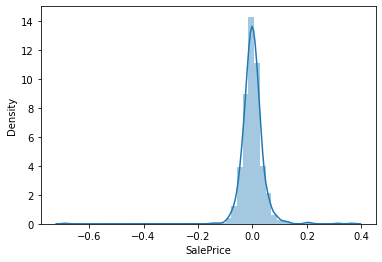

In [77]:
# Calculating the resuduals
res = y_fullData_train - y_pred_train
sns.distplot(res)
plt.show()

#### Residuals are normally distributed and has a mean of 0

### Checking Homoscedasticity

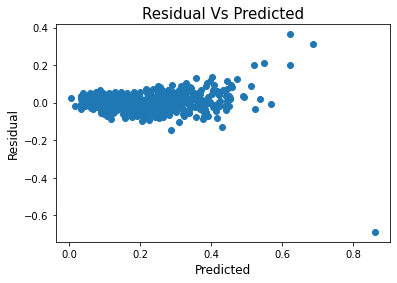

In [78]:
plt.scatter(y_pred_train, res)
plt.ylabel('Residual', fontsize=12)                          
plt.xlabel('Predicted', fontsize=12) 
plt.title("Residual Vs Predicted", fontsize = 15)
plt.show()

#### The residuals are spread around 0 with no pattern except for few outliers. Hence heteroscedasticity is proved

C:\Users\raora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


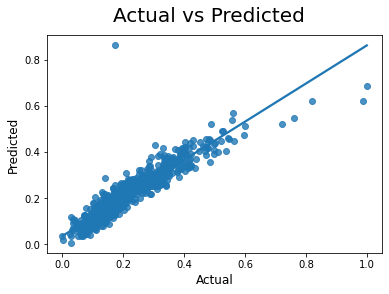

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_fullData_train,y_pred_train, ci=None)  
fig.suptitle('Actual vs Predicted', fontsize=20)             
plt.xlabel('Actual', fontsize=12)                          
plt.ylabel('Predicted', fontsize=12)
plt.show()

### Assumptions Validated
1. Residuals are normally distributed and centered at 0.
2. Constant variance as residuals are normally distributed.
3. There is a linear relationship from the above plot.